# ML CK segmentation for small molecule set
## For Vanesa Silvestri
## 09/27/21

### Random Forest classifier
### Author: Andy D. Tran, CCR Microscopy Core, LCBG, CCR, NCI

In [1]:
#Load libraries

import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle
import re

from scipy import ndimage as nd
from tifffile import imread, imsave
from skimage.filters import roberts, sobel, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from datetime import datetime
from skimage import morphology

In [2]:
#Define feature extraction function

def feature_extract(img):
    df = pd.DataFrame() #Create empty dataframe
    
    print('Add orginal pixel values') # Reshape pixel values, add to dataframe
    org = img.reshape(-1) 
    df['org_image'] = org
    
    print('Add Gabor features')  # Generate Gabor features
    num = 1              
    kernels = []
    
    for theta in range(2):
        theta = theta / 4 * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
            
                    gabor_label = 'Gabor' + str(num)
                    ksize = 3
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                    kernels.append(kernel)
            
                    fimg = cv2.filter2D(img, cv2.CV_16UC3, kernel)
                    filtered_img = fimg.reshape(-1)
            
                    df[gabor_label] = filtered_img
                    num += 1
                    
    print('Add Median filter') #Add Median filter
    for sigma in range(2, 8):
        print('Sigma = ' + str(sigma))
        
        median_tmp = nd.median_filter(img, size=sigma)
        median_img = median_tmp.reshape(-1)
        median_header = 'Median_sigma_' + str(sigma)
        
        df[median_header] = median_img
        
    print('Add Sobel edge detection')  # Add Sobel edge detection
    edge_sobel_tmp = sobel(img)
    edge_sobel_tmp = nd.gaussian_filter(edge_sobel_tmp, sigma = 3)
    edge_sobel = edge_sobel_tmp.reshape(-1)
    
    df['sobel'] = edge_sobel
    
    return df
    
    print('Feature extraction done!')

In [3]:
# Define image loading, model application, and output function

def model_apply(img):
    print('Opening ' + img)
    print('Image feature extraction started: ' + str(datetime.now()))
    input_path = os.path.join(base_path, img)
    ck_path = os.path.join(input_path, 'ck.tif')
    ck = imread(ck_path)
    df = feature_extract(ck)
    print('Image feature extraction finished: ' + str(datetime.now()))
    
    print('ML model started: ' + str(datetime.now()))
    ck_tmp = model.predict(df)
    ck_mask = ck_tmp.reshape(ck.shape)
    ck_mask = morphology.area_opening(ck_mask, area_threshold = 5)
    print('ML model finished: ' + str(datetime.now()))
    
    plt.figure(figsize = (10, 10))
    plt.imshow(ck_mask, cmap = 'gray')
    plt.axis('off')
    
    #mask_name = img.replace('.tif', '_label.tif') 
    mask_name = 'ck_label.tif'
    output_path2 = os.path.join(output_path, img)
    mask_path = os.path.join(output_path2, mask_name)
    imsave(mask_path, ck_mask)
    
    print('Pixel classification done: ' + str(datetime.now()))


In [4]:
# Define paths

base_path = '/data/tranad/image/silvestv/images/biocytin_set_03'
model_path = '/data/tranad/image/silvestv/ML_small_molecule/ck_model_hpc_02'
output_path = '/data/tranad/image/silvestv/images/biocytin_set_03'

In [5]:
# Load pickle model

model = pickle.load(open(model_path, 'rb'))

/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [6]:
#img_list = os.listdir(base_path)
#print(img_list)
#print(len(img_list))

In [7]:
img_list = ['IgG_2h_555', 'TZ_60min_555', 'TZ_60min_555_2', 'TZ_2h_557', 'IgG_6h_574', 'IgG_60min_571', 'IgG_60min_571_2', 'IgG_6h_554', 'TZ_4h_5', ]

print(img_list)

['IgG_2h_555', 'TZ_60min_555', 'TZ_60min_555_2', 'TZ_2h_557', 'IgG_6h_574', 'IgG_60min_571', 'IgG_60min_571_2', 'IgG_6h_554', 'TZ_4h_5']


Opening IgG_2h_555
Image feature extraction started: 2022-05-19 10:34:13.121096
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 10:38:07.175435
ML model started: 2022-05-19 10:38:07.175616


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 10:44:54.583853
Pixel classification done: 2022-05-19 10:44:55.272656
Opening TZ_60min_555
Image feature extraction started: 2022-05-19 10:44:56.412853
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 10:49:48.211557
ML model started: 2022-05-19 10:49:48.211741


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 10:59:49.192824
Pixel classification done: 2022-05-19 10:59:49.979163
Opening TZ_60min_555_2
Image feature extraction started: 2022-05-19 10:59:51.423840
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:04:45.311709
ML model started: 2022-05-19 11:04:45.311876


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 11:14:45.356628
Pixel classification done: 2022-05-19 11:14:46.158103
Opening TZ_2h_557
Image feature extraction started: 2022-05-19 11:14:47.603160
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:19:00.901975
ML model started: 2022-05-19 11:19:00.902245


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 11:26:32.768780
Pixel classification done: 2022-05-19 11:26:33.404486
Opening IgG_6h_574
Image feature extraction started: 2022-05-19 11:26:34.533879
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:30:27.983655
ML model started: 2022-05-19 11:30:27.983842


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 11:37:08.654558
Pixel classification done: 2022-05-19 11:37:09.146591
Opening IgG_60min_571
Image feature extraction started: 2022-05-19 11:37:10.113827
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:40:31.976802
ML model started: 2022-05-19 11:40:31.976926


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 11:46:37.215068
Pixel classification done: 2022-05-19 11:46:37.794989
Opening IgG_60min_571_2
Image feature extraction started: 2022-05-19 11:46:38.696813
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:49:47.489740
ML model started: 2022-05-19 11:49:47.489863


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 11:55:15.175401
Pixel classification done: 2022-05-19 11:55:15.630561
Opening IgG_6h_554
Image feature extraction started: 2022-05-19 11:55:16.399574
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 11:59:32.544721
ML model started: 2022-05-19 11:59:32.544892


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 12:07:36.542240
Pixel classification done: 2022-05-19 12:07:37.275862
Opening TZ_4h_5
Image feature extraction started: 2022-05-19 12:07:38.451157
Add orginal pixel values
Add Gabor features
Add Median filter
Sigma = 2
Sigma = 3
Sigma = 4
Sigma = 5
Sigma = 6
Sigma = 7
Add Sobel edge detection
Image feature extraction finished: 2022-05-19 12:11:24.521725
ML model started: 2022-05-19 12:11:24.521994


/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ML model finished: 2022-05-19 12:17:36.349133
Pixel classification done: 2022-05-19 12:17:36.874401


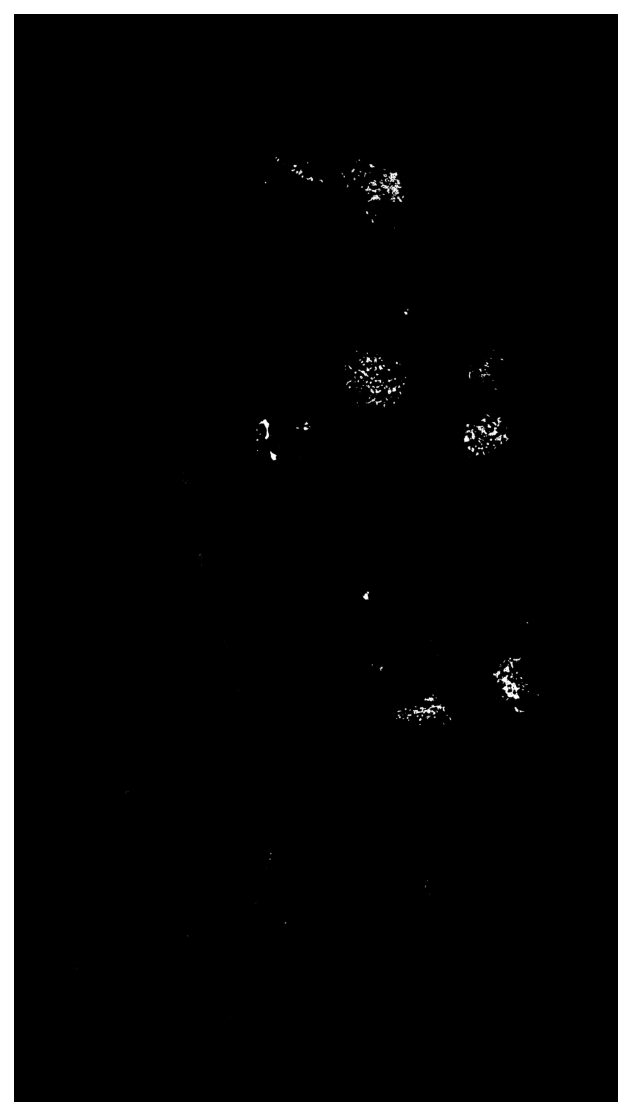

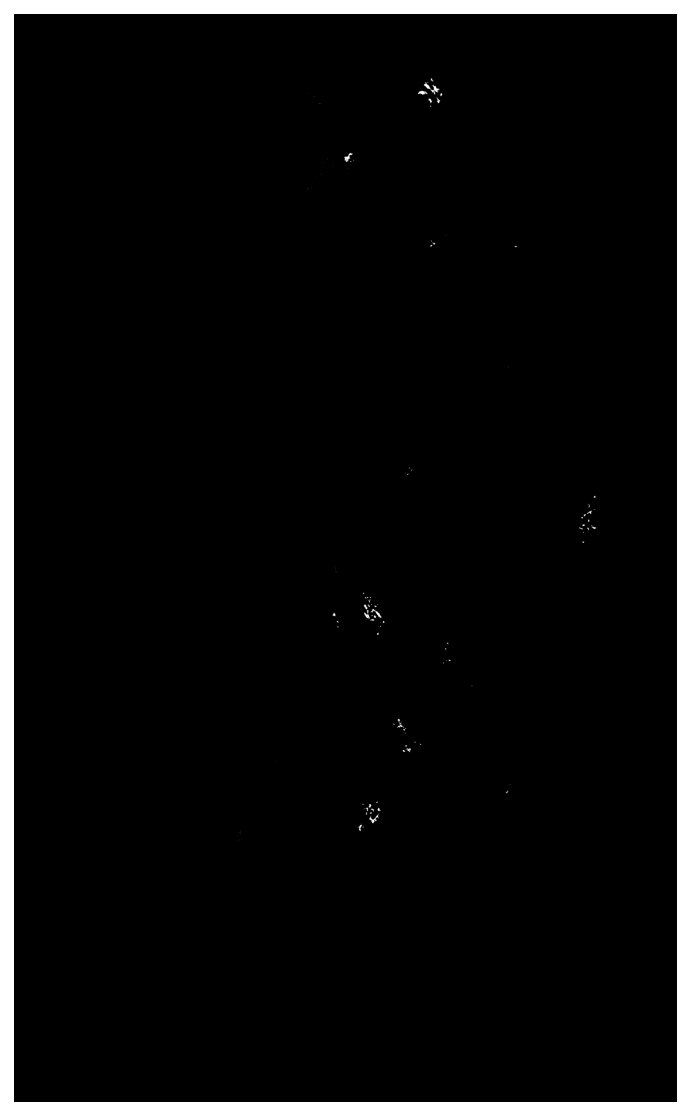

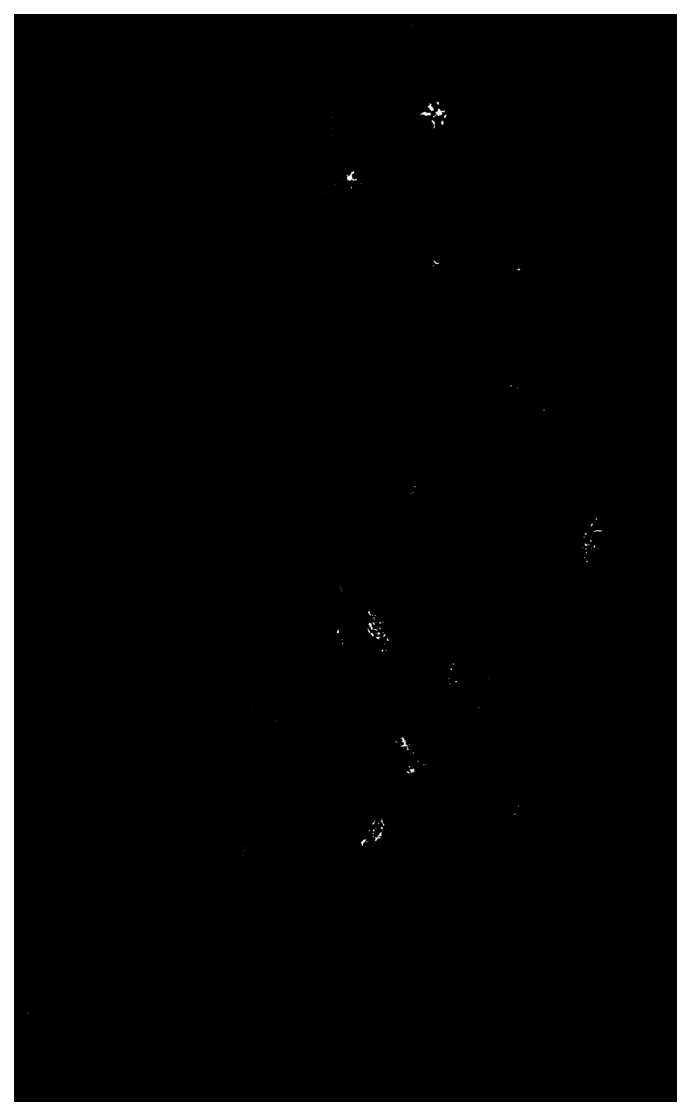

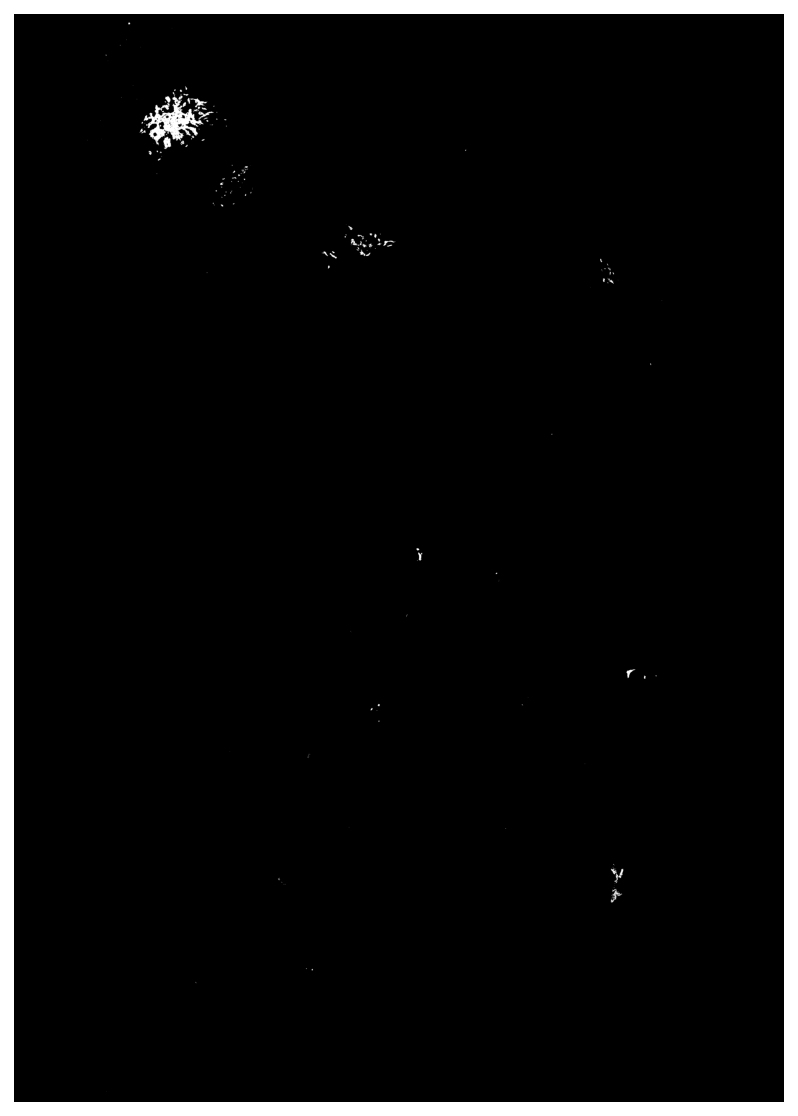

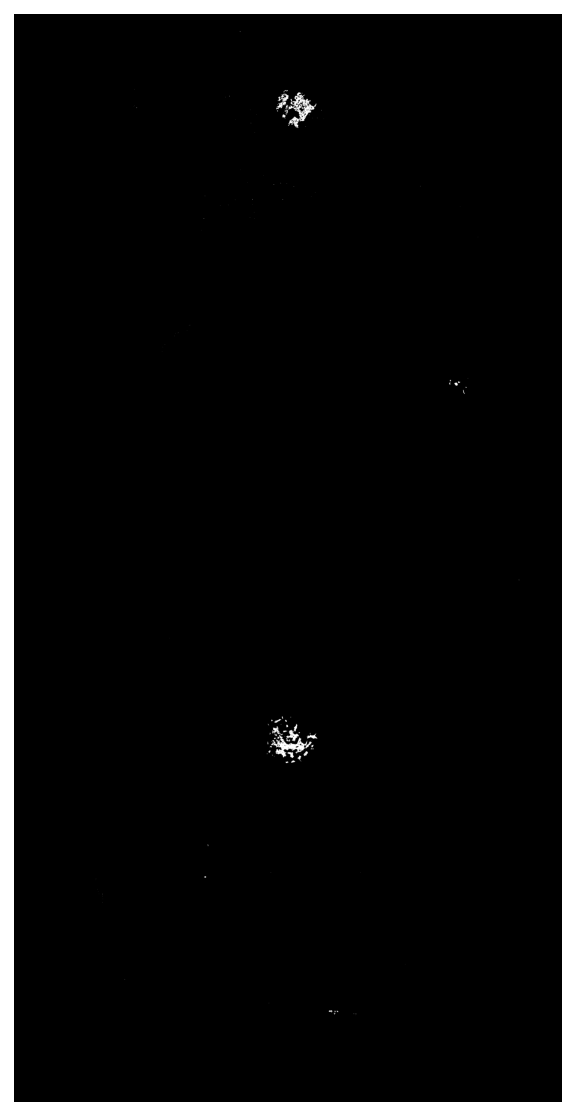

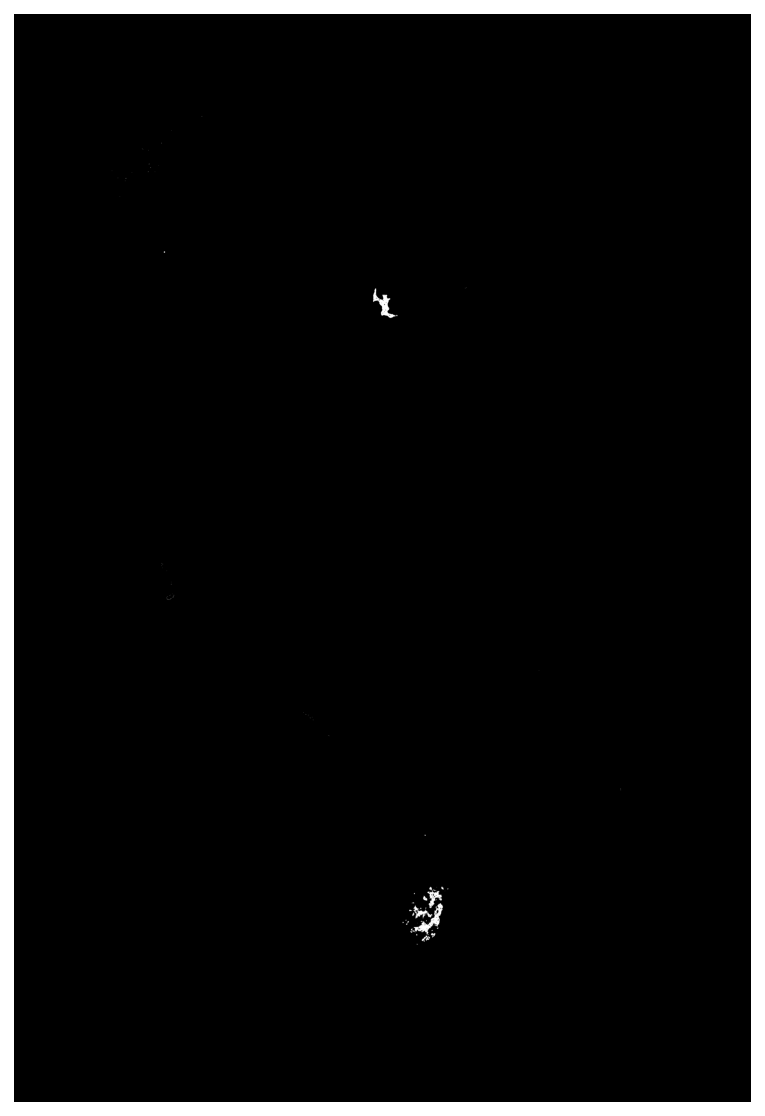

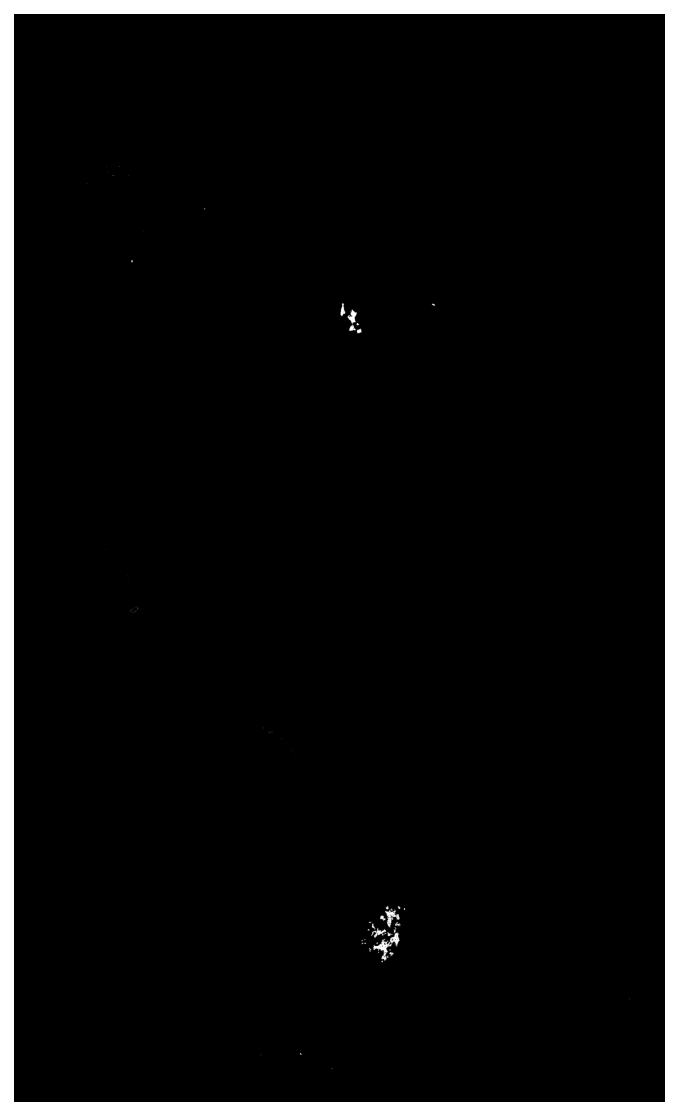

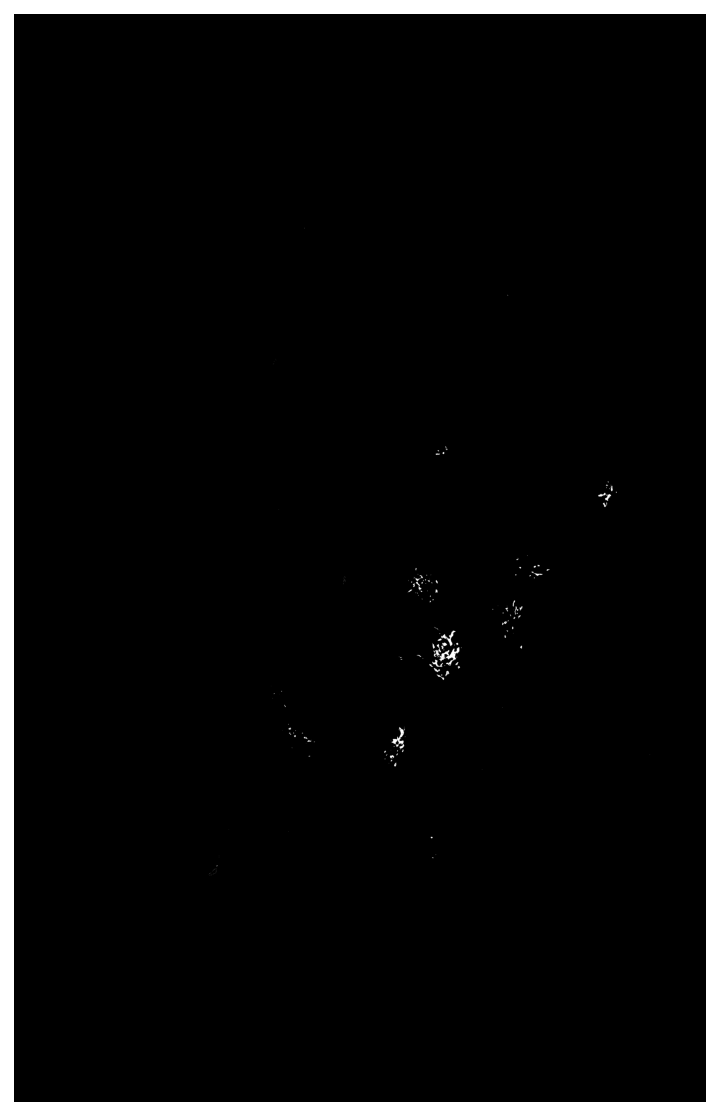

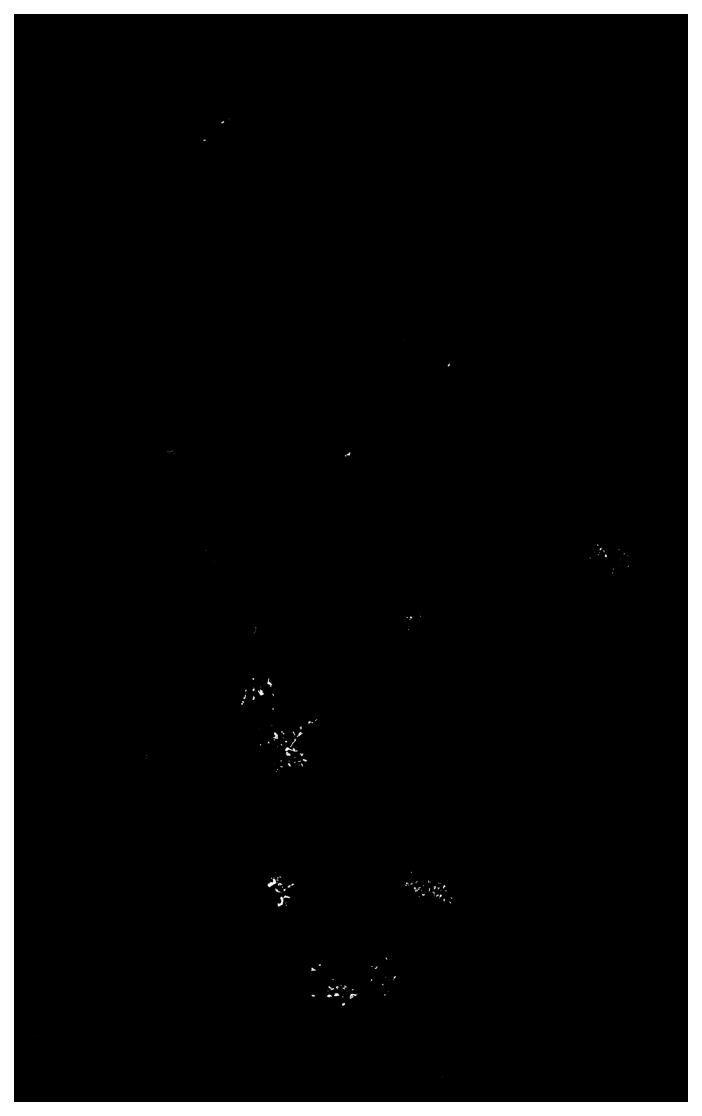

In [8]:
for img in img_list:
    model_apply(img)

In [9]:
#model_apply('ck.tif')